# CREDIT CARD APPROVAL PREDICTION

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extracting data using two data sources

In [2]:
app = pd.read_csv("application_record.csv")
crecord = pd.read_csv("credit_record.csv")

In [3]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
crecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


<AxesSubplot:>

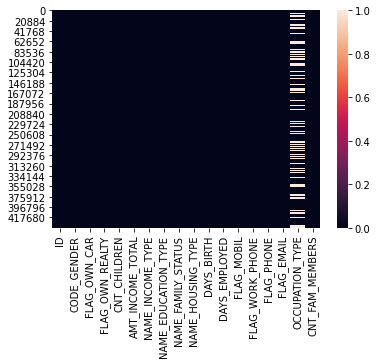

In [4]:
sns.heatmap(app.isnull())

<AxesSubplot:>

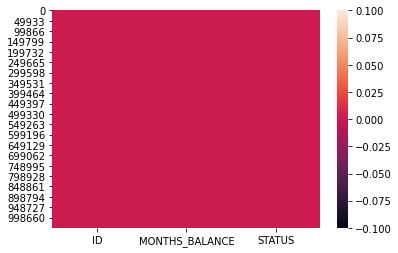

In [5]:
sns.heatmap(crecord.isnull()) 

In [6]:
# Dropping Duplicates n Occupation_type Column
app.drop_duplicates('ID', keep='last') 
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [7]:
app['DAYS_BIRTH'] = round(app['DAYS_BIRTH']/-365,0)
app.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)
app['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)
app['DAYS_EMPLOYED'] = abs(round(app['DAYS_EMPLOYED']/-365,0))
app.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True) 

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1,0,0,0,1.0


<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

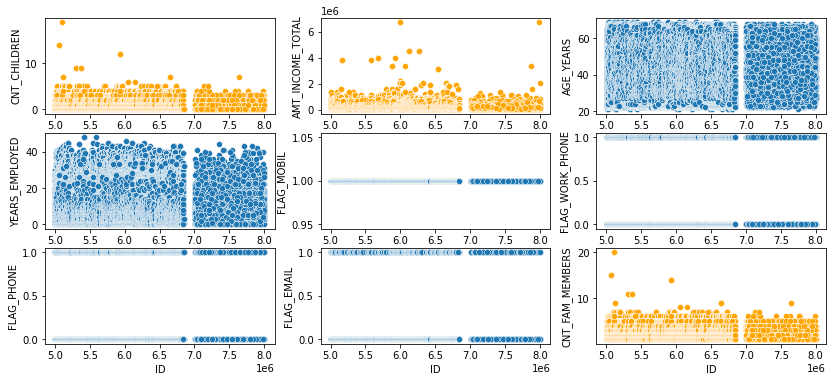

In [9]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='AGE_YEARS', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='YEARS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

### Removing Outliers

In [10]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [11]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [12]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

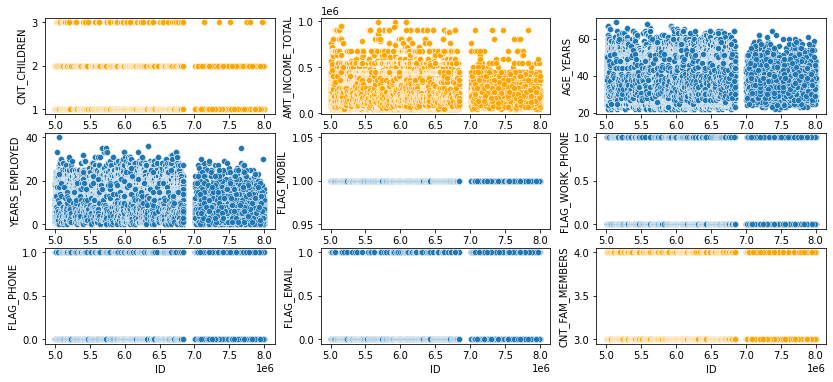

In [14]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='AGE_YEARS', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='YEARS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

In [15]:
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns.
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head()

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0


In [16]:
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
crecord['STATUS'].value_counts(normalize=True)*100

0    99.703979
1     0.296021
Name: STATUS, dtype: float64

In [17]:
#we are grouping the data in crecord by ID so that we can join it with app
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [18]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,32.0,6.0,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,32.0,6.0,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,32.0,6.0,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,32.0,6.0,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,32.0,6.0,1,0,0,0,3.0,0


In [19]:
X = df.iloc[:,1:-1] # X value contains all the variables
y = df.iloc[:,-1] # these are the labels

### Visualization

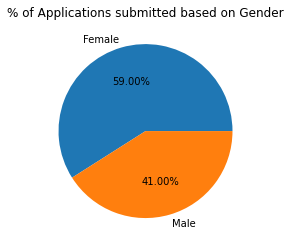

In [20]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

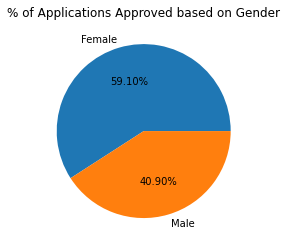

In [21]:
# This graph shows that, majority of application are approved for Female's
plt.pie(df[df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

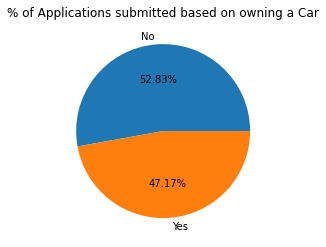

In [22]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

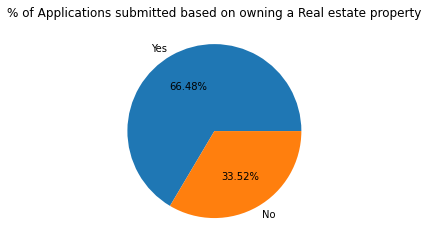

In [23]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

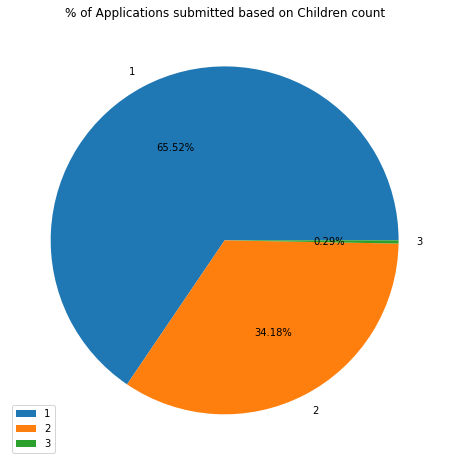

In [24]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(df['CNT_CHILDREN'].value_counts(), labels=df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

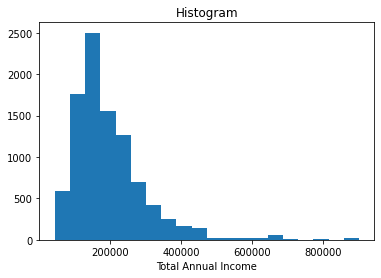

In [25]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.hist(df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

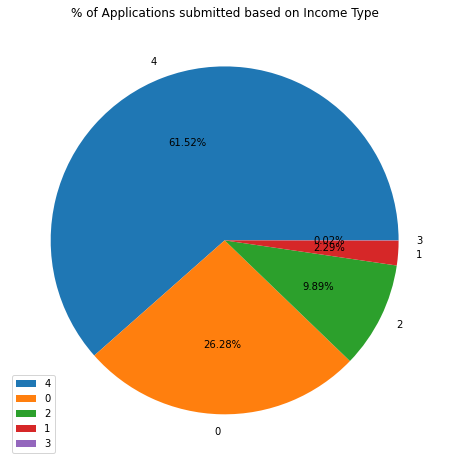

In [26]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(df['NAME_INCOME_TYPE'].value_counts(), labels=df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

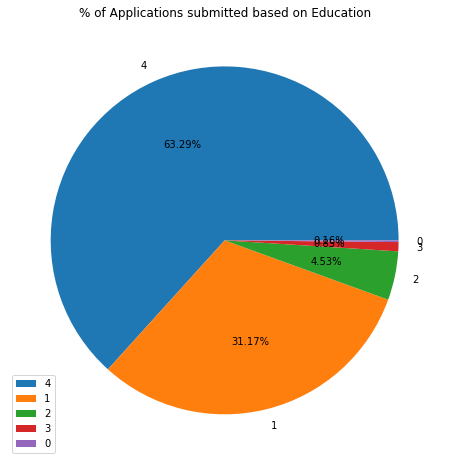

In [27]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(df['NAME_EDUCATION_TYPE'].value_counts(), labels=df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

/home/devdarsshan/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


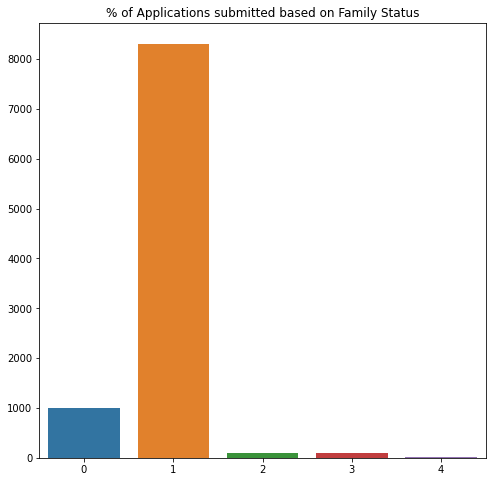

In [28]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(df['NAME_FAMILY_STATUS'].value_counts().index, df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

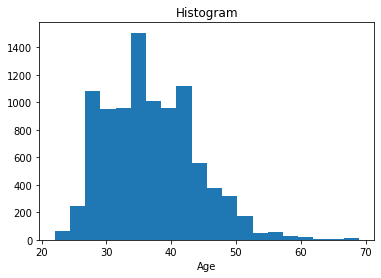

In [29]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

### Balancing Dataset

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [33]:
y_train.value_counts()

0    6554
1     107
Name: STATUS, dtype: int64

In [34]:
y_balanced.value_counts()

0    6554
1    6554
Name: STATUS, dtype: int64

In [35]:
y_test.value_counts()

0    2811
1      44
Name: STATUS, dtype: int64

In [36]:
y_test_balanced.value_counts()

0    2811
1    2811
Name: STATUS, dtype: int64

### Training Model

In [37]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(X_balanced, y_balanced)

print('Logistic Model Accuracy : ', log_model.score(X_balanced, y_balanced)*100, '%')


Logistic Model Accuracy :  62.08422337503815 %


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)
RandomForest_model.fit(X_balanced, y_balanced)
print('Random Forest Model Accuracy : ', RandomForest_model.score(X_balanced, y_balanced)*100, '%')

prediction = RandomForest_model.predict(X_test_balanced)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_balanced, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_balanced, prediction))

Random Forest Model Accuracy :  97.97833384192859 %

Confusion matrix :
[[2733   78]
 [ 403 2408]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2811
           1       0.97      0.86      0.91      2811

    accuracy                           0.91      5622
   macro avg       0.92      0.91      0.91      5622
weighted avg       0.92      0.91      0.91      5622

